### Multiple Average Current

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:
fCurrent = { # '0kV': '/Users/yuntse/data/slarchetto/monitoring/FieldShellCurrent_202205151130.csv', 
             '7.5kV': '/Users/yuntse/data/slarchetto/monitoring/FieldShellCurrent_202205151630.csv',
             '5kV': '/Users/yuntse/data/slarchetto/monitoring/FieldShellCurrent_202205151530.csv',
             '2.5kV': '/Users/yuntse/data/slarchetto/monitoring/FieldShellCurrent_202205151230.csv',
             '1kV': '/Users/yuntse/data/slarchetto/monitoring/FieldShellCurrent_202205181900.csv',
             '900V': '/Users/yuntse/data/slarchetto/monitoring/FieldShellCurrent_202205182002.csv',
             '800V': '/Users/yuntse/data/slarchetto/monitoring/FieldShellCurrent_202205182015.csv',
             '750V': '/Users/yuntse/data/slarchetto/monitoring/FieldShellCurrent_202205181951.csv',
             '500V': '/Users/yuntse/data/slarchetto/monitoring/FieldShellCurrent_202205181927.csv',
             }

In [3]:
Current = {}
for i, src in fCurrent.items():
    Current[i] = pd.read_csv(src, header = None, skiprows = 1, names = ['Time', 'Current'])

In [4]:
for i, src in Current.items():
    src['Time'] = src['Time'].transform(lambda t: datetime.strptime(t, '%Y-%m-%d %H:%M:%S.%f'))
    src['Duration'] = src['Time'] - min(src['Time'])
    # print (src)

In [5]:
# Change the dataframe to series
CurrentSeries = {}
for i, src in Current.items():
    CurrentSeries[i] = Current[i]['Current'].squeeze()

In [6]:
# Number of samples to take the average
windowSize = 40

CurrentWindow = {}
CurrentAveS = {}
CurrentStdS = {}

for i, src in CurrentSeries.items():
    # Get the window of series
    # of observations of specified window size
    CurrentWindow[i] = CurrentSeries[i].rolling( windowSize )
  
    # Create a series of moving
    # averages of each window
    CurrentAveS[i] = CurrentWindow[i].mean()
    # std of each window
    CurrentStdS[i] = CurrentWindow[i].std()

In [7]:
MultiCurrentAve = {}
for i, src in CurrentAveS.items():
    # Convert the series to data frame
    CurrentAve = CurrentAveS[i].to_frame()
    CurrentStd = CurrentStdS[i].to_frame()
    # Insert the time stamp and the std to the current average data frame
    CurrentAve.insert( 1, 'Time', Current[i]['Time'] )
    CurrentAve.insert( 2, 'Duration', Current[i]['Duration'] )
    CurrentAve.insert( 3, 'Std', CurrentStd )
    # Add a column of std/average in %
    CurrentAve = CurrentAve.assign( Variation = lambda x: x.Std/-x.Current*100. )
    # Remove the NaN rows
    CurrentAve = CurrentAve.dropna()
    print( CurrentAve )
    MultiCurrentAve[i] = CurrentAve

          Current                    Time               Duration       Std  \
39  -41114.635547 2022-05-15 16:36:39.883 0 days 00:06:30.017000  8.601156   
40  -41114.635547 2022-05-15 16:36:49.883 0 days 00:06:40.017000  8.601156   
41  -41114.760547 2022-05-15 16:36:59.884 0 days 00:06:50.018000  8.653186   
42  -41114.285547 2022-05-15 16:37:09.884 0 days 00:07:00.018000  6.977918   
43  -41114.753125 2022-05-15 16:37:19.884 0 days 00:07:10.018000  7.834624   
..            ...                     ...                    ...       ...   
181 -41097.859863 2022-05-15 17:00:29.934 0 days 00:30:20.068000  6.666653   
182 -41098.014941 2022-05-15 17:00:39.934 0 days 00:30:30.068000  6.867903   
183 -41098.052441 2022-05-15 17:00:49.935 0 days 00:30:40.069000  6.896487   
184 -41098.214941 2022-05-15 17:00:59.935 0 days 00:30:50.069000  6.947444   
185 -41098.270020 2022-05-15 17:01:09.935 0 days 00:31:00.069000  6.937334   

     Variation  
39    0.020920  
40    0.020920  
41    0.0210

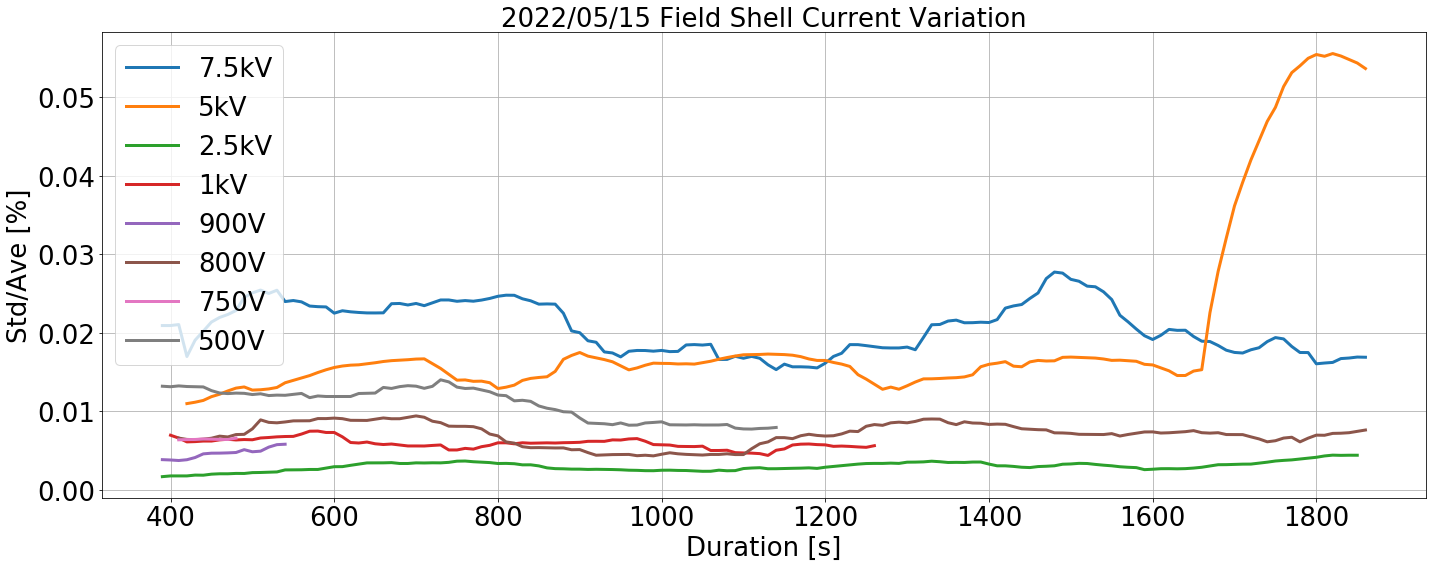

In [8]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize = (20,8))

# make a plot
for i, src in MultiCurrentAve.items():
    ax.plot( src['Duration']/1e9, src['Variation'], label = i, lw = 3)
# set x-axis label
ax.set_xlabel('Duration [s]', fontsize = 26)
ax.tick_params(axis = 'x', labelsize = 26)
# set y-axis label
ax.set_ylabel('Std/Ave [%]', fontsize = 26)
ax.tick_params(axis = 'y', labelsize = 26)

# set plot title
ax.set_title( label = '2022/05/15 Field Shell Current Variation', fontsize = 26)

ax.grid('.')
ax.legend(loc = 'best', ncol = 1, fontsize = 26)

plt.tight_layout()
plt.show()

# save the plot as a file
fig.savefig('/Users/yuntse/Documents/DUNE/SLArchetto/Monitoring/FieldShellCurrentVariation_20220515.png')

In [9]:
print( MultiCurrentAve['750V']['Variation'])

39    0.006360
40    0.006389
41    0.006403
42    0.006468
43    0.006411
44    0.006401
45    0.006575
Name: Variation, dtype: float64
